## Movies Dataset Correlations Analysis with Python

<img src="https://media.gq.com/photos/59556b078e996a4571a38d30/16:9/w_2560%2Cc_limit/SummerBlockbusterMovies.png" width="700" align="center" />


Welcome to my first data portfolio using python, today our data target is movies dataset that you can easily get from Kaggle, [here]('https://www.kaggle.com/datasets/danielgrijalvas/movies')<br>
As explained with the title, the goal is to explore and find connections, patterns which then can be translated to data insights where it can benefit us to make data driven decisions in our work. Or we can boast our superior knowledge of movie income to others.

#### 1. Setting up the environment and the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline 
# plt.rcParams['figure.figsize'] = (14,8)
import re

import seaborn as sns

In [2]:
movies_df = pd.read_csv("D:\Data Science Project\Portfolio Project\Python\movies.csv")
# Top 5 rows of data shows us a glimpse of the data we're dealing with
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# It's a good idea also to know the shape or rows/cols of the data
movies_df.shape

(7668, 15)

#### 2. Data cleaning

Let's do some data cleaning and perform the necessary steps for any irregularity we may find.

In [4]:
# Checking and dropping duplicates
movies_df = movies_df.drop_duplicates()
movies_df.shape
# this checks and drops all duplicate values from all the columns

(7668, 15)

As it turns out there is no duplicates on the data, the shape is still the same as the initial shape.

In [5]:
# Checking null values in movies_df
for col in movies_df.columns:
    total_missing = movies_df[col].isnull().sum()
    print('{} - {}'.format(col, total_missing))
# Actually, we could've used 'movies_df.isnull().sum()' but I felt like doing an extra formatting with strings

name - 0
rating - 77
genre - 0
year - 0
released - 2
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4


As it turns out, there are many nulls here and there in the data. As the main focus of this project is not in cleaning the data, we will drop all rows that has null(s) in it.<br>
Also if you think about it, we want to find correlations in between the features. It wouldn't be sensible to analyze data with missing scores, budgets, and gross incomes, and that's just a few out of many more.

In [6]:
# Dropping rows with nulls
movies_df = movies_df.dropna()
movies_df.shape

(5421, 15)

Simple arithmetics show 2247 rows of data have been dropped

In [7]:
# Checking data types of each column
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Changing data types of some columns
movies_df['gross'] = movies_df['gross'].astype('int64')
movies_df['budget'] = movies_df['budget'].astype('int64')
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

Now, a little digging exposes that there are 2 columns containing the year each movies were released; 'year' and 'released' <br>
The years of those two columns should be the same, but as it turns out, there are inconsistencies. Assuming that the 'released' has the correct year, we have to extract it to a new column

In [9]:
# call up movies_df to see the context of strings we want to extract the year from
movies_df[:5]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [10]:
# Extracting year data from 'released'
movies_df['correct_year'] = movies_df['released'].str.extract(pat = '([0-9]{4})').astype(int)
# Basically what this does is just looking for numbers from the 'released' column where there are four numbers consecutively, which only occurs once every row, the year
movies_df.dtypes

name             object
rating           object
genre            object
year              int64
released         object
score           float64
votes           float64
director         object
writer           object
star             object
country          object
budget            int64
gross             int64
company          object
runtime         float64
correct_year      int32
dtype: object

In [11]:
# After confirming the correct_year is indeed an int32, let's see it for real
movies_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
# Now we'll sort the data based on highest grossing first, let's list 8 of them
movies_df.sort_values(by = ['gross'], inplace = False, ascending = False).head(8)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


#### 3. Analytics

Just based on the previous cell, we can already see Avatar and Avengers: Endgame sit at the top. That's in sync with the past news about those movies breaking records of enormous incomes

Now we can start by doing visualizations. Right off the bat, your average Joe can hypothesize that there must be a strong correlation between budget and the gross income. Let's try to confirm that

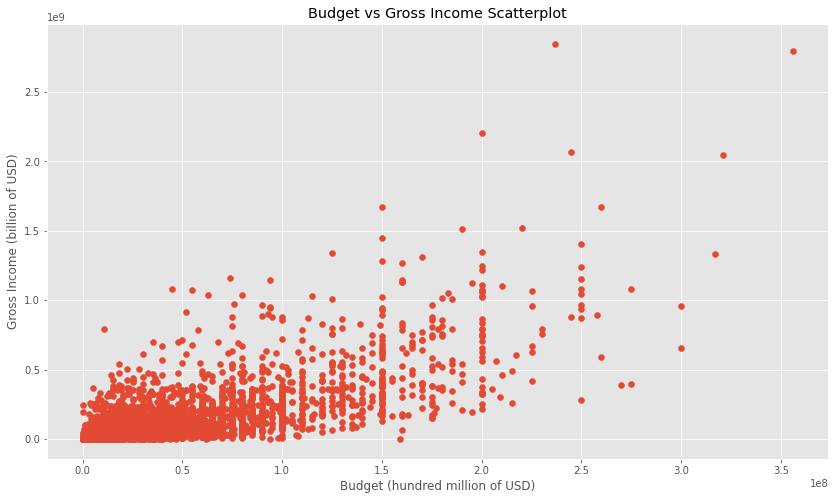

In [13]:
# Making a budget vs gross (income) scatterplot
figsize = (8,5) # Modify the size ratio here, usually for exporting the viz
plt.scatter(x = movies_df['budget'], y = movies_df['gross'])
plt.xlabel('Budget (hundred million of USD)')
plt.ylabel('Gross Income (billion of USD)')
plt.title('Budget vs Gross Income Scatterplot')
plt.show()

# Sorry couldn't be bothered to adjust the bin size of the plot

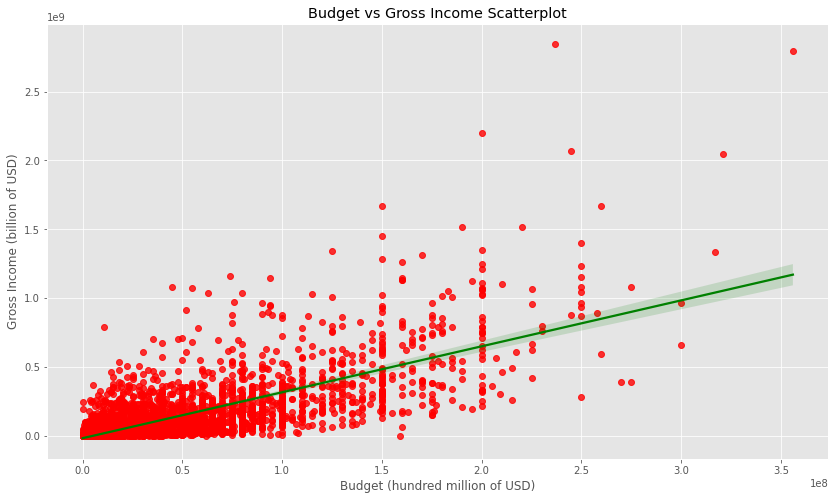

In [14]:
# We could actually make the previous plot with seaborn, let's try it while also adding a regression plot
figsize = (8,5)
sns.regplot(data = movies_df, x = 'budget', y = 'gross', scatter_kws= {'color' : 'red'}, line_kws = {'color' : 'green'})
plt.xlabel('Budget (hundred million of USD)')
plt.ylabel('Gross Income (billion of USD)')
plt.title('Budget vs Gross Income Scatterplot')
plt.show()

Now let's try seeing the correlation in numbers. For those unfamiliar, this function basically does calculations of a method of specified correlation between all features (columns)

In [15]:
# Using a correlation function
movies_df.corr()
# Disclaimer: at default it will use the standard Pearson method

,year,score,votes,budget,gross,runtime,correct_year
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Damn, I forgot to delete the year column. But this also proves there are some inconsistencies between year and correct_year like mentioned earlier, as it isn't 1. Now on to drop the column.

In [16]:
del movies_df['year']
movies_df.columns # 'year' column should cease to exist

Index(['name', 'rating', 'genre', 'released', 'score', 'votes', 'director',
       'writer', 'star', 'country', 'budget', 'gross', 'company', 'runtime',
       'correct_year'],
      dtype='object')

In [17]:
# Back to correlation (corr)
movies_df.corr()

,score,votes,budget,gross,runtime,correct_year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
correct_year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


I don't know about you, but getting a grasp of that table looking at the highest values gives me a headache, so why don't we just sort it.

In [18]:
# Sorting the corr values in descending order
a12 = movies_df.corr().abs()
b12 = a12.unstack()
c12 = b12.sort_values(kind = 'quicksort', ascending = False) # Don't mind the weird naming of the variables
c12[7::2]

budget        gross           0.740247
gross         votes           0.614751
score         votes           0.474256
budget        votes           0.439675
score         runtime         0.414068
votes         runtime         0.352303
correct_year  budget          0.320312
budget        runtime         0.318695
gross         runtime         0.275796
              correct_year    0.268721
              score           0.222556
votes         correct_year    0.203098
correct_year  runtime         0.075294
budget        score           0.072001
correct_year  score           0.061923
dtype: float64

There it is, now we can clearly see which corrs are the strongest to the weakest. Or we can even try to visualize it using what is referred to as heatmap.

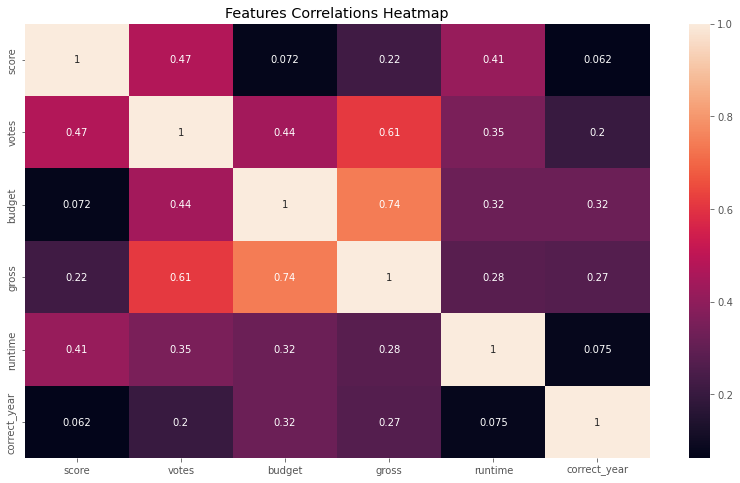

In [19]:
# Making heatmap out of corrs
corr_matrix = movies_df.corr()
figsize = (8,5)
sns.heatmap(data = corr_matrix, annot = True)
plt.title('Features Correlations Heatmap')
plt.show()

As you can see, the heatmap is also good way to effectively showcase the corrs of each attribute. The nearer a value to 1, the more likely it is to be positively correlated. Likewise values, that come near to -1 means a negative correlation.

Now as one might notice, the corrs displayed are all from columns with numerical value (int32, float64). <br>
With non numerical columns like 'company', we have to translate its values into numerics so the corr function can be done. 

In [20]:
# Creating a copy of movies_df
movies_df_numeric = movies_df.copy(deep = True) # A deep copy is preferred

In [21]:
movies_df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [22]:
# Converting strings to numerics
for i in movies_df_numeric:
    if movies_df_numeric[i].dtype == 'object': #object refers to strings or words
        movies_df_numeric[i] = movies_df_numeric[i].astype('category')
        movies_df_numeric[i] = movies_df_numeric[i].cat.codes
    else:
        movies_df_numeric[i] = movies_df_numeric[i]

movies_df_numeric.head(5)
# For corr purposes this will do, as we're only focused on each feature's significance.
# There's also another method called categorical encoding which is more suitable for machine learning purposes
# Will use those in future projects!

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980


In [23]:
# Comparing it to the original movies_df
movies_df.head(5)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


Now each string values is assigned its own numbers, as the 2 movies has 'R' rating, it is now replaced with 6

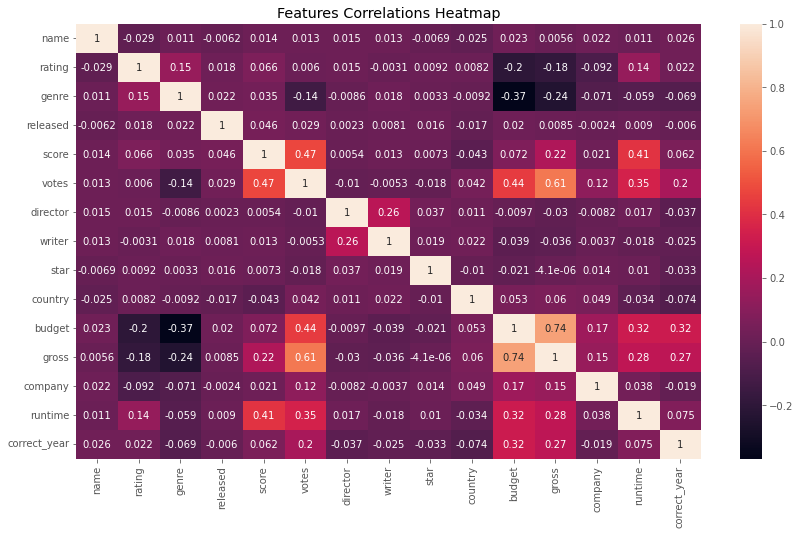

In [24]:
# Making heatmap out of corrs with new all numerical movies_df_numeric
corr_matrix_numeric = movies_df_numeric.corr()
figsize = (10,8)
sns.heatmap(data = corr_matrix_numeric, annot = True)
plt.title('Features Correlations Heatmap')
plt.show()

I'm not gonna bother you showing the full corr table, it's a mess to look at for sure. But we're just gonna try showing the top correlations that have the value of greater than 0.4. You can also look at the color legend that there is no value that nears the -1 (-1 meaning a totally negative linear correlation).

In [25]:
a13 = movies_df_numeric.corr().abs()
b13 = a13.unstack()
c13 = b13.sort_values(kind = 'quicksort', ascending = False) # Again with the weird naming
okay_corrs = c13[(c13) > 0.4]
okay_corrs[15::2]

budget  gross      0.740247
gross   votes      0.614751
score   votes      0.474256
budget  votes      0.439675
score   runtime    0.414068
dtype: float64

#### 4. Concluding...

These are some of my initial hypotheses:
1. Budget and gross income would have a positive correlation
2. Newer movies (in year) would have more gross income in average for reasons; more people go to movie theaters (increasing population,  larger pool of buyers) and inflation (as the gross income is not inflation adjusted in the data)
3. An acclaimed director would have a positive correlation with gross income also

Well now we know that:
1. This is confirmed to be true
2. With a corr of 0.27, not really a good hit
3. With a corr of -0.03, this can be considered as false

Instead, there is a good positive correlation of gross income and votes. There is also a weak positive correlation between votes and (budget and rating score). Plus, who knew that longer runtime gives the studio a considerable chance for higher revenue.

That basically wraps it, please know that this is a far cry to comprehensive and in depth analysis of the whole movies dataset. I believe there are much more we can get out of this dataset. But I got to test my hypotheses and even got some extra insights of the data I never would've guessed. If I have more time, I'd have dived much more in depth honestly, but basically I've met my goals here. Sort of

Thank you for reading folks, lookin' forward to the next project! God Bless <br><br><br>

| Date (DD-MM-YYYY) | Author                             |
| ----------------- | ---------------------------------- |
| 04-11-2022        | Edricnes                           |
